In [38]:
from keras.datasets import imdb
import time
import numpy as np
import seaborn as sns

In [39]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

In [40]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [41]:
train_labels[0]

1

In [42]:

def vectorize_sequences(sequences, dimension=5000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [43]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [44]:
# Our vectorized labels one-hot encoder
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [45]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
#Set validation set aside

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [48]:
start_time_m1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1

Epoch 1/20
30/30 [==============================] - 5s 86ms/step - loss: 0.5420 - acc: 0.7585 - val_loss: 0.3628 - val_acc: 0.8599
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2824 - acc: 0.8949 - val_loss: 0.2861 - val_acc: 0.8840
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2022 - acc: 0.9262 - val_loss: 0.2895 - val_acc: 0.8823
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1632 - acc: 0.9422 - val_loss: 0.3053 - val_acc: 0.8783
Epoch 5/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1340 - acc: 0.9533 - val_loss: 0.3323 - val_acc: 0.8739
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1110 - acc: 0.9629 - val_loss: 0.3659 - val_acc: 0.8698
Epoch 7/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0937 - acc: 0.9702 - val_loss: 0.4063 - val_acc: 0.8682
Epoch 8/20
30/30 [==============================] - 2s 64ms/step - loss: 0.0775 - a

In [49]:
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

The Dense Convolutional Neural Network 1 layer took 42.2895 seconds to train.


In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

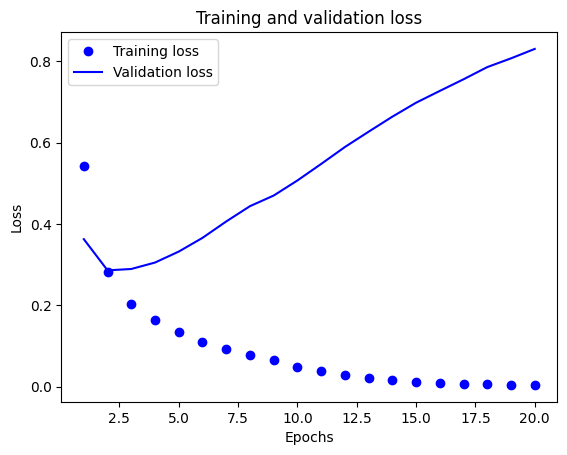

In [51]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

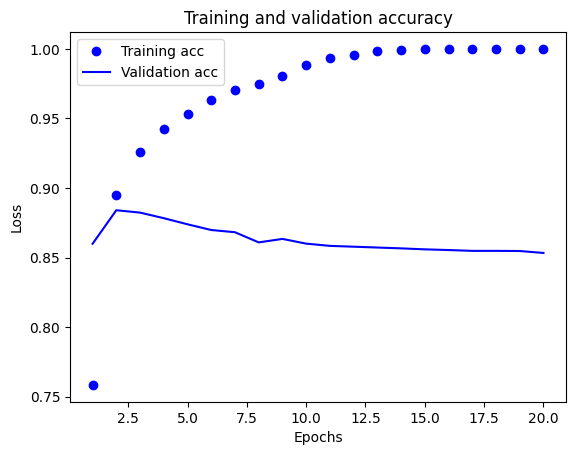

In [52]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                160032    
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161,121
Trainable params: 161,121
Non-trainable params: 0
_________________________________________________________________


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc
#predictions
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)

#accuracy
accuracy_score(y_test,classes_x)

782/782 [==============================] - 4s 5ms/step


0.5

[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

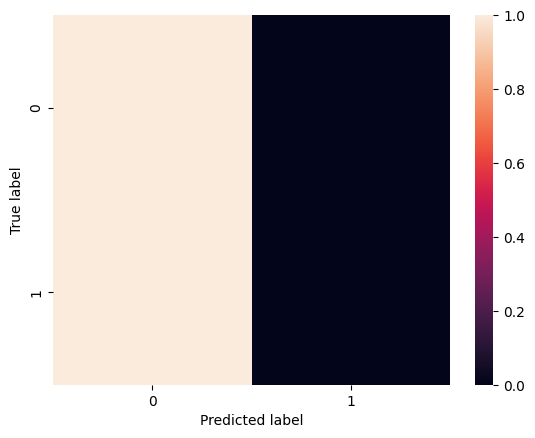

In [55]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')